## Data Loading

## Import necessary modules

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# sklearn
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# wordCloud
#from wordcloud import WordCloud

# pickle
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


## Create Class

In [2]:
class DataUnderstanding():
    """Class that gives the data understanding of a dataset"""
    def __init__(self, data='None'):
        """Initialisation"""
        self.df = data

    def load_data(self, path):
        """Loading the data"""
        if self.df == 'None':
            self.df = pd.read_csv(path, encoding='latin-1')
        return self.df

    def understanding(self):
        # Info
        print("""INFO""")
        print("-"*4)
        self.df.info()

        # Shape
        print("""\n\nSHAPE""")
        print("-"*5)
        print(f"Records in dataset are {self.df.shape[0]} with {self.df.shape[1]} columns.")

        # Columns
        print("\n\nCOLUMNS")
        print("-"*6)
        print(f"Columns in the dataset are:")
        for idx in self.df.columns:
            print(f"- {idx}")

        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-"*12)
        for col in self.df.columns:
            print(f"Column *{col}* has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in the *{col}* include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")

        # Missing or Null Values
        print("""\nMISSING VALUES""")
        print("-"*15)
        for col in self.df.columns:
            print(f"Column *{col}* has {self.df[col].isnull().sum()} missing values.")

        # Duplicate Values
        print("""\n\nDUPLICATE VALUES""")
        print("-"*16)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")

## Load data

In [4]:
# Load the dataset
data = DataUnderstanding()
df = pd.read_csv('C:/Users/WILSON MACHOKA/Desktop/phase_4/twitter-sentiment-analysis/data/judge-1377884607_tweet_product_company.csv', encoding='latin1')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/WILSON MACHOKA/Desktop/phase_4/twitter-sentiment-analysis/data/judge-1377884607_tweet_product_company.csv'

## Data Understanding

In [26]:
import pandas as pd

class DataUnderstanding:
    def __init__(self):
        self.df = None  # Initialize df as None

    def load_data(self, path):
        """Loading the data"""
        if self.df is None:  # Check if df is None
            self.df = pd.read_csv(path, encoding='latin1')  # Load DataFrame
        return self.df

    def understanding(self):
        """Display information about the DataFrame"""
        print("INFO")
        print("-" * 4)
        self.df.info()  # Display DataFrame info

        # Shape
        print("Shape:", self.df.shape)

        # First few rows
        print("First few rows:")
        print(self.df.head())

        # Check for missing values
        missing_values = self.df.isnull().sum()
        print("\nMissing Values:")
        print(missing_values[missing_values > 0])  # Only show columns with missing values

        # Check for duplicates
        duplicates = self.df.duplicated().sum()
        print("\nNumber of duplicate rows:", duplicates)

# Load the dataset
data = DataUnderstanding()
df = data.load_data('C:/Users/WILSON MACHOKA/Desktop/phase_4/twitter-sentiment-analysis/data/judge-1377884607_tweet_product_company.csv')

# Call the understanding method
data.understanding()


INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
Shape: (9093, 3)
First few rows:
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone  

## COMMENTS

All the columns are in the correct data types.

The columns will need to be renamed.

Features with missing values should be renamed from NaN.

Duplicate records should be dropped.

All records with the target as "I can't tell" should be dropped.

Corrupted records should be removed.

## Data Cleaning

## Validity
## Corrupted Records in the *tweet_text Column*

##### The data seems to be corrupted in some records. To correct this issue, we create a function that can find these corrupted records, and returns their indexes. We use this index to remove the record from the working dataframe.

In [27]:
# A function targeting corrupted records
def is_corrupted(tweet):
    """This func returns the index of any record that is corrupted"""
    corrupted_cols = []
    for key, text in enumerate(tweet):
        if any(ord(char) > 127 for char in str(text)) == True:
            corrupted_cols.append(key)
    return corrupted_cols

In [28]:
# Applying the is_corrupted function to find the indexes of the corrupted records
corrupted_records_idx = is_corrupted(df['tweet_text'])

In [29]:
# Test to check if the function worked as intended
df.loc[corrupted_records_idx]['tweet_text'].values[0]

'@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW'

In [30]:
# Drop these records
df.drop(index=corrupted_records_idx, inplace=True)

In [31]:
# Test to ensure there are no corrupted records left
is_corrupted(df['tweet_text'])

[]

## 
Drop Records in the *is_there_an_emotion_directed_at_a_brand_or_product column where the value is "I can't tell"*

In [32]:
# Identification of the record
bad_reaction_idx = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"].index

# Drop the columns
df.drop(index = bad_reaction_idx, inplace=True)

# Test
df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


## 
Replace Fields in the *is_there_an_emotion_directed_at_a_brand_or_product column where the value is "No emotion toward brand or product" to "Neutral emotion"*

In [33]:
# Identification of the record
neutral_reaction_idx = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] ==\
                              "No emotion toward brand or product"].index

# Replace the values
df.loc[neutral_reaction_idx, 'is_there_an_emotion_directed_at_a_brand_or_product'] = "Neutral emotion"

# Test
df[df['is_there_an_emotion_directed_at_a_brand_or_product'] == "No emotion toward brand or product"]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


## Completeness

##
Drop Missing Values in the *tweet_text column*

In [34]:
tweet_missing = df[df['tweet_text'].isnull() == True].index
df.loc[tweet_missing]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,Neutral emotion


In [35]:
# Drop the record
df.drop(index=tweet_missing, inplace=True)

In [36]:
# Check
df[df['tweet_text'].isnull() == True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


##
Fill Missing Values in the *emotion_in_tweet_is_directed_at column*

In [37]:
# Find the records with missing values in the 2nd column
df[df['emotion_in_tweet_is_directed_at'].isnull() == True].shape[0]

5331

In [38]:
# List of unique products/ services
products = list(df.emotion_in_tweet_is_directed_at.unique())
products.remove(np.nan) # Removes any np.nan items

def find_product(tweet):
    """This func takes in a tweet and returns the product talked about in the
    tweet; used to fill in the emotion_in_tweet_is_directed_at column"""
    for product in products:
        if str(product) in tweet or str(product).upper() in tweet \
            or  str(product).lower() in tweet or str(product).title() in tweet:
            return product

# Applying the function to find the index of records with missing values in the 2nd column
missing_products_idx = df[df['emotion_in_tweet_is_directed_at'].isnull() == True].index

In [39]:
# Replace the field where there are missing values in the emotion_in_tweet_is_directed_at column
df.loc[missing_products_idx, 'emotion_in_tweet_is_directed_at'] = df.loc[missing_products_idx, 'tweet_text']\
                                                                        .apply(lambda x: find_product(x))

In [40]:
# In case any field was not captured by our function, we can change it to 'None'
none_index = df[df['emotion_in_tweet_is_directed_at'].isnull()].index
df.loc[none_index, 'emotion_in_tweet_is_directed_at'] = 'None'
# df.loc[none_index]

In [41]:
# Check
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               2273
Google                             1984
Apple                              1269
iPhone                             1093
None                                720
iPad or iPhone App                  448
Android                             284
Other Google product or service     278
Android App                          77
Other Apple product or service       33
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [42]:
# Number of values in the column are the same as the length of the data
np.sum(df['emotion_in_tweet_is_directed_at'].value_counts().values) == df.shape[0]

True

## COMMENTS


Noting that the missing data consists of over 5000 rows, this represent a significant proportion of the data if we dropped this data.

To counter this problem, knowing that there are limited observable products in the 2nd column, we can read each tweet and, find and replace the missing value with the relevant product the tweet talks about.

In the end, we were able to assign all tweets to a product and only 720 were not talking about a product explicitly.

## Consistency

##
 Drop the duplicates

In [43]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [45]:
# Check if there is any remaining duplicate values
df.duplicated().sum()

0

## Uniformity

##
Rename the columns

In [63]:
# Change the column names
df.rename(columns={'tweet_text': "tweet",
                  'emotion_in_tweet_is_directed_at':"product",
                  'is_there_an_emotion_directed_at_a_brand_or_product': "emotion"},
         inplace=True)

In [47]:
# Check
df.columns

Index(['tweet', 'product', 'emotion'], dtype='object')

##
Reset the Index of the dataframe

In [64]:
# Reset the index
df.reset_index(inplace=True)
# Drop the old index column
df.drop(labels='index', axis=1, inplace=True)
df

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product



## Conclusion

To ensure that the cleaning process worked efficiently, we can access the DataUnderstanding class to perform final checks before proceeding to the next section.

In [58]:

#data_understanding = DataUnderstanding()
#data_understanding.df = df  # Set the DataFrame directly
#data_understanding.understanding()

## Data Visualization

In [65]:
print(df.columns)

Index(['tweet', 'product', 'emotion'], dtype='object')


In [66]:
def plot_bar(feature, plot='bar'):
    """This func returns a bar or a barh plot"""
    if plot == 'bar':
        labels = df[feature].value_counts().index
        values = df[feature].value_counts().values
        plt.bar( x=labels,height=values)
        plt.ylabel("Count")
        plt.xlabel("Categories")
    else:
        labels = df[feature].value_counts(ascending=True).index
        values = df[feature].value_counts(ascending=True).values
        plt.barh(width=values, y=labels)
        plt.xlabel("Count")
        plt.ylabel("Categories")
    plt.title(f"Distribution of the {feature.title()} feature");

Distribution of the *emotion feature*

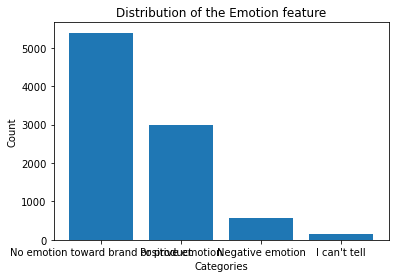

In [67]:
plot_bar('emotion')

Observation

The distribution shows a huge class imbalance between categories. The Neutral Emotion category holds over 50% of the data.

## Distribution of the *product feature*

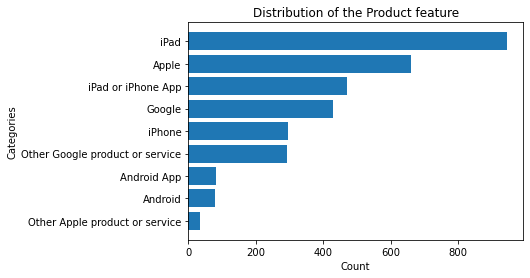

In [68]:
plot_bar('product', plot='barh')

Observation

The data reveals there was a lot of sentiments concerning the iPad in the period, followed closely by the Google and Apple company.


The data has a 'None' category meaning that it did not concern the Apple of Google products originally set out at the start of the project.